# DSI19 Project 3 - Data Cleaning & EDA
---

## Table of Contents

* [1. Data Cleaning](#chapter1)
    * [1.1 Read in Extracted Data](#chapter1_1)
    * [1.2 Combine into Single DataFrame](#chapter1_2)
    * [1.3 Combine Text](#chapter1_3)
    * [1.4 Create Target](#chapter1_4)
    * [1.5 Analysis and Insights](#chapter1_5)
* [2. Text Processing](#chapter2)
    * [2.1 Tokenizing and Outlier Removal](#chapter_2_1)
    * [2.2 Pull from Subreddits](#chapter_2_2)
* [3. Text Feature Extraction](#chapter3)
    * [2.1 Defining Function](#chapter3_1)
    * [2.1 Results and Analysis](#chapter3_2)

In [1]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

## 1. Data Cleaning <a class="anchor" id="chapter1"></a>
---

As a NLP model is being built for classification into 2 different subreddits, our objective of data cleaning and processing would be to have a dataframe with a column with text to be used as the `X variable`, and a column with values `1` and `0` to label the subreddit it belongs to. For the purpose of this model, the labels will be classified as:
- `1` for posts belonging to `/r/tifu`
- `0` for posts belonging to `/r/confessions`

Steps to be taken for data cleaning.
1. Combine data from both subreddits into a single dataframe
2. Combine text from both the `title` and the `selftext` into a single column in the dataframe
3. Create a target column with respective labels for the subreddits

### 1.1 Read in Extracted Data <a class="anchor" id="chapter1_1"></a>

In [2]:
# Read in extracted data
tifu_df = pd.read_csv('../data/tifu_subreddit.csv')
confessions_df = pd.read_csv('../data/confessions_subreddit.csv')

In [3]:
display(tifu_df.head()) # Displaying data for /r/tifu subreddit

,name,title,selftext,ups,num_comments,subreddit
0,t3_kvjlmn,TIFU By accidentally being racist to an Asian ...,Today I fucked up by being racist to my Asian ...,0,1,tifu
1,t3_kvjgp0,TIFU by ordering dish towels from Amazon (NSFW),Obligatory this happened about 30 minutes ago ...,4,2,tifu
2,t3_kvj1zy,TIFU because I told the teacher I like drugs,Pretty short story... my math teacher was gett...,2,2,tifu
3,t3_kvih6z,TIFU by losing my phone and getting picked up ...,This actually happened fall semester of 2004. ...,0,0,tifu
4,t3_kvif4c,TIFU by setting out a digital picture frame,TIFU by setting out a digital picture frame\n\...,0,1,tifu


In [4]:
print(tifu_df.shape) # Checking shape of /r/tifu subreddit

(997, 6)


In [5]:
display(confessions_df.head()) # Displaying data for /r/confessions subreddit

,name,title,selftext,ups,num_comments,subreddit
0,t3_kvjhce,I cheated :(,God this hard to say and it might get burried ...,0,4,confessions
1,t3_kvj9ow,I got the biggest crush on a Netflix special d...,Raphael Rowe \n\n\nI mean...I’m surprised at m...,1,0,confessions
2,t3_kvj90s,My blonde sister delivered her black son tonight,She's naming him George Floyd Jr. I couldn't b...,0,1,confessions
3,t3_kviyeb,I think I am becoming racist towards white peo...,I’m a white-passing minority living in the US ...,1,13,confessions
4,t3_kviy4c,Can’t handle one part in one movie,I’m an avid dog lover. But I also love John Wi...,2,1,confessions


In [6]:
print(confessions_df.shape) # Checking shape of /r/confessions subreddit

(992, 6)


In [7]:
# Check for duplicate posts
print(tifu_df.drop_duplicates().shape)
print(confessions_df.drop_duplicates().shape)

(997, 6)
(992, 6)


As confirmed from the data extraction notebook, there are 997 posts extracted from the `/r/tifu` subreddit and 992 posts extracted from the `/r/confessions` subreddit. There are also no duplicate posts extracted from the two subreddits.

### 1.2 Combine into Single DataFrame <a class="anchor" id="chapter1_2"></a>

In [8]:
data_df = pd.concat([tifu_df,confessions_df],axis=0,ignore_index=True) # Concat both dataframes into single dataframe

In [9]:
display(data_df.head())

,name,title,selftext,ups,num_comments,subreddit
0,t3_kvjlmn,TIFU By accidentally being racist to an Asian ...,Today I fucked up by being racist to my Asian ...,0,1,tifu
1,t3_kvjgp0,TIFU by ordering dish towels from Amazon (NSFW),Obligatory this happened about 30 minutes ago ...,4,2,tifu
2,t3_kvj1zy,TIFU because I told the teacher I like drugs,Pretty short story... my math teacher was gett...,2,2,tifu
3,t3_kvih6z,TIFU by losing my phone and getting picked up ...,This actually happened fall semester of 2004. ...,0,0,tifu
4,t3_kvif4c,TIFU by setting out a digital picture frame,TIFU by setting out a digital picture frame\n\...,0,1,tifu


In [10]:
print(data_df.shape)

(1989, 6)


There are a total of 1989 data rows, showing that the dataframes have been successfully combined.

### 1.3 Combine Text <a class="anchor" id="chapter1_3"></a>

In [11]:
print(data_df.isnull().sum()) # Checking for null values in the data

name              0
title             0
selftext        101
ups               0
num_comments      0
subreddit         0
dtype: int64


Is is observed that there are 101 rows where `selftext` is NaN. As both the text from both the title and the body of the post are to be used in the model, the NaN values will be replaced by an empty string before combining.

In [12]:
data_df['selftext'].fillna('',inplace=True) # Replacing NaN values in 'selftext' with empty string

In [13]:
print(data_df.isnull().sum()) # Checking that null values have been removed.

name            0
title           0
selftext        0
ups             0
num_comments    0
subreddit       0
dtype: int64


In [14]:
# Create feature to store text of both title an body of post
data_df['total_text'] = data_df['title'] + ' ' + data_df['selftext']

In [15]:
display(data_df.head())

,name,title,selftext,ups,num_comments,subreddit,total_text
0,t3_kvjlmn,TIFU By accidentally being racist to an Asian ...,Today I fucked up by being racist to my Asian ...,0,1,tifu,TIFU By accidentally being racist to an Asian ...
1,t3_kvjgp0,TIFU by ordering dish towels from Amazon (NSFW),Obligatory this happened about 30 minutes ago ...,4,2,tifu,TIFU by ordering dish towels from Amazon (NSFW...
2,t3_kvj1zy,TIFU because I told the teacher I like drugs,Pretty short story... my math teacher was gett...,2,2,tifu,TIFU because I told the teacher I like drugs P...
3,t3_kvih6z,TIFU by losing my phone and getting picked up ...,This actually happened fall semester of 2004. ...,0,0,tifu,TIFU by losing my phone and getting picked up ...
4,t3_kvif4c,TIFU by setting out a digital picture frame,TIFU by setting out a digital picture frame\n\...,0,1,tifu,TIFU by setting out a digital picture frame TI...


In [16]:
print(data_df['total_text'][0]) # Display combined text

TIFU By accidentally being racist to an Asian friend. Today I fucked up by being racist to my Asian friend. 

If I were to describe myself culturally, I would say I'm the "Renaissance man" type. I'm a humanist by nature &amp;amp; and a philanthropist through interest. 

Now if I were to describe my humor, I would say I'm a cross between Jim Carry &amp;amp; Dave Chappell. A couple of my two favorites comedians!

So with that said. I tend to take joy in being involved in the different cultures of the world. I don't have a single negative idea for any culture at all.. because they are all cultures of man. (Maybe a bit hippy.. I must admit...) So the Dave chapel part comes into play because I find humor in cultural cues &amp;amp; ticks.. things that set us apart but make us the same all in all. 

So I met with my Asian friend a few days ago to take some photos of his flipping sweet new haircut. See, This is where I get people in my grips. I have their full attention &amp;amp; can speak int

### 1.4 Create Target <a class="anchor" id="chapter1_4"></a>

Labels will be given as follows:
- `1` for posts from `/r/tifu`
- `0` for posts from `/r/confessions`

In [17]:
data_df['classifier'] = data_df['subreddit'].map({'tifu':1,'confessions':0}) # Creating target column

In [18]:
display(data_df.head())

,name,title,selftext,ups,num_comments,subreddit,total_text,classifier
0,t3_kvjlmn,TIFU By accidentally being racist to an Asian ...,Today I fucked up by being racist to my Asian ...,0,1,tifu,TIFU By accidentally being racist to an Asian ...,1
1,t3_kvjgp0,TIFU by ordering dish towels from Amazon (NSFW),Obligatory this happened about 30 minutes ago ...,4,2,tifu,TIFU by ordering dish towels from Amazon (NSFW...,1
2,t3_kvj1zy,TIFU because I told the teacher I like drugs,Pretty short story... my math teacher was gett...,2,2,tifu,TIFU because I told the teacher I like drugs P...,1
3,t3_kvih6z,TIFU by losing my phone and getting picked up ...,This actually happened fall semester of 2004. ...,0,0,tifu,TIFU by losing my phone and getting picked up ...,1
4,t3_kvif4c,TIFU by setting out a digital picture frame,TIFU by setting out a digital picture frame\n\...,0,1,tifu,TIFU by setting out a digital picture frame TI...,1


### 1.5 Analysis and Insights <a class="anchor" id="chapter1_5"></a>

In [19]:
# Creating features to look at the length of characters in the title and the body of the posts
data_df['selftext_len'] = data_df['selftext'].map(lambda x: len(x))
data_df['title_len'] = data_df['title'].map(lambda x: len(x))

In [20]:
display(data_df.groupby('subreddit').describe().T)

subreddit            confessions          tifu
ups          count    992.000000    997.000000
             mean      75.271169    999.558676
             std      551.937176   5177.492488
             min        0.000000      0.000000
             25%        0.000000      7.000000
             50%        3.000000     18.000000
             75%        7.000000     58.000000
             max     7390.000000  66113.000000
num_comments count    992.000000    997.000000
             mean      12.740927     57.308927
             std       52.051345    243.364587
             min        0.000000      0.000000
             25%        2.000000      4.000000
             50%        4.000000      9.000000
             75%        9.000000     19.000000
             max     1011.000000   3214.000000
classifier   count    992.000000    997.000000
             mean       0.000000      1.000000
             std        0.000000      0.000000
             min        0.000000      1.000000
             25%        0.000000      1.000000
             50%        0.000000      1.000000
             75%        0.000000      1.000000
             max        0.000000      1.000000
selftext_len count    992.000000    997.000000
             mean     919.254032   1923.568706
             std     1312.705425   1088.812054
             min        0.000000    752.000000
             25%      176.000000   1159.000000
             50%      542.500000   1609.000000
             75%     1191.000000   2378.000000
             max    17632.000000  11721.000000
title_len    count    992.000000    997.000000
             mean      56.845766     51.615848
             std       41.704881     23.593569
             min        3.000000     10.000000
             25%       29.000000     35.000000
             50%       47.000000     47.000000
             75%       72.250000     62.000000
             max      299.000000    220.000000

Findings:
- Mean of `/r/tifu` upvotes is significant higher than `/r/confessions`
- Mean of `/r/tifu` number of comments is significant higher than `/r/confessions`
- Length of body in `/r/tifu` is generally higher than `/r/confessions`
- Length of title in `/r/tifu` is generally about the same as `/r/confessions`

Insights:
- Findings of the upvotes and number of comments is consistent with our understand of the subreddit as `/r/tifu` has ~16.7 million members compared to `/r/confessions` with ~0.8 million members
- While both subreddits belong to the story category, posts in `/r/tifu` tend to be a lot more descriptive
- Title of the posts however, have no significant variance between the two (likely due to a character limit in the title of the posts)

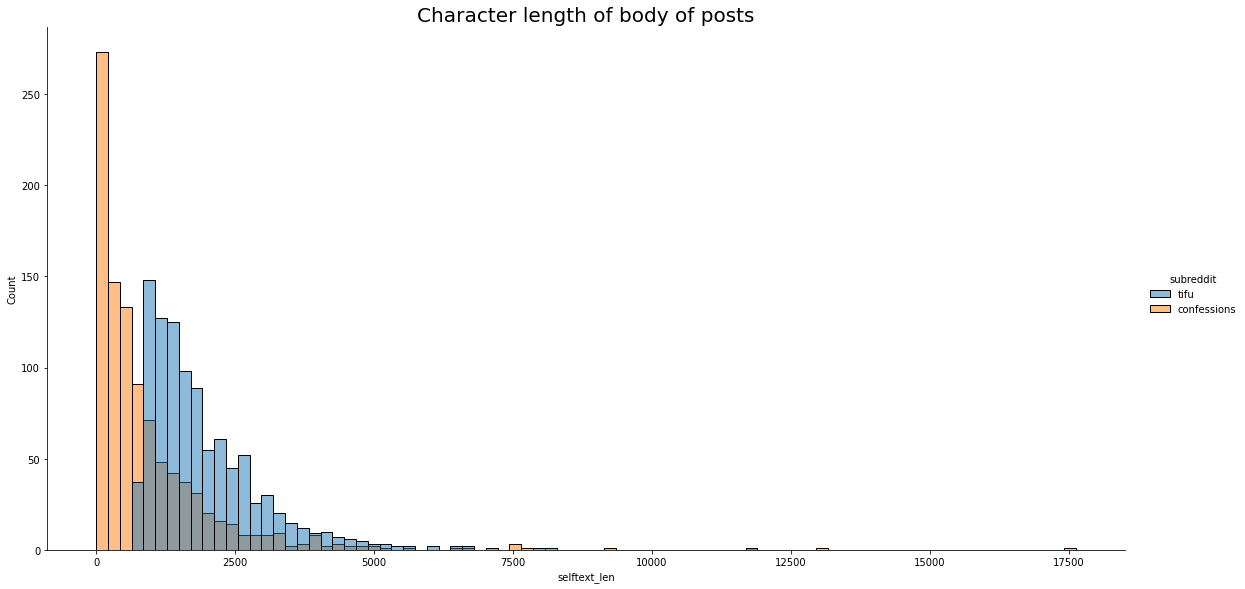

In [21]:
# Plotting distribution of length of body in /r/tifu compared to /r/confessions
sns.displot(data_df, x='selftext_len', hue='subreddit', kind = 'hist', height = 8, aspect = 2,)
plt.title("Character length of body of posts",fontsize=20);

- Observed that the length of text in the body of `/r/tifu` posts are generally higher than that of `/r/confessions`

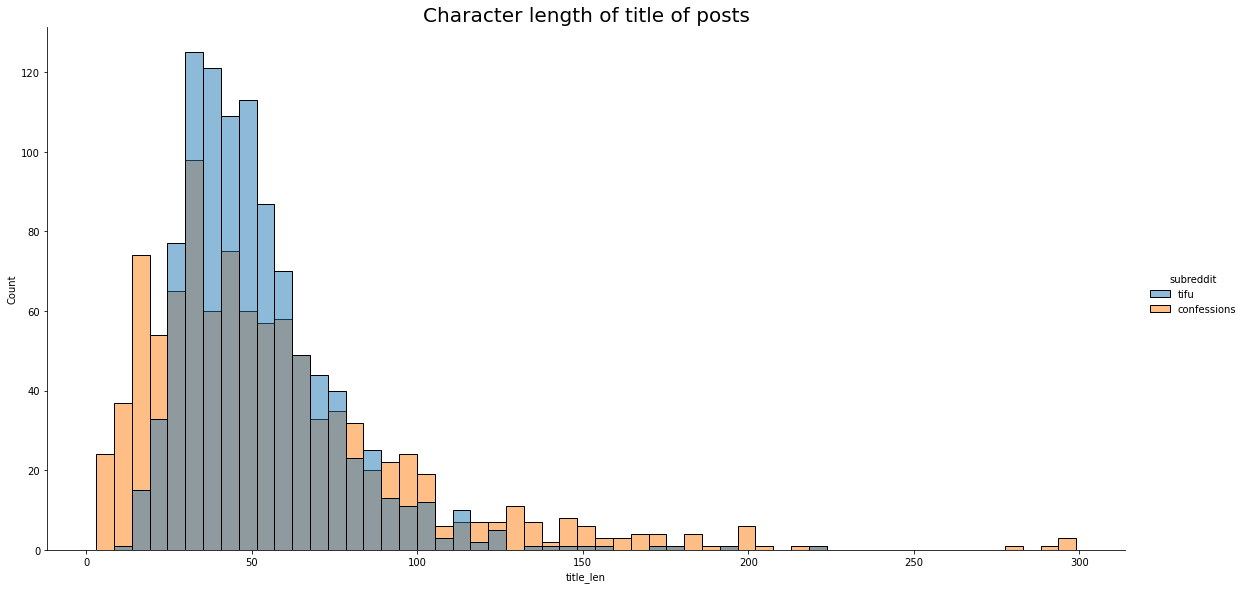

In [22]:
# Plotting distribution of length of title in /r/tifu compared to /r/confessions
sns.displot(data_df, x='title_len', hue='subreddit', kind = 'hist', height = 8, aspect = 2)
plt.title("Character length of title of posts",fontsize=20);

- Observed that the distribution of length of title are roughly similar

In [23]:
data_df.to_csv('../data/clean_data.csv',index=False)

## 2. Text Processing <a class="anchor" id="chapter2"></a>
---

The model will be making use of the combined text data from the title and the body of the posts. From the text, 3 versions will be created to use for the model. 

- `text_base`: Tokenizing the text using regex to remove characters and only keep the words. To be used for model selection.
- `text_lem`: Lemmatizing the `text_base` to examine effect on selected model
- `text_stem`: Stemming the `text_base` to examine effect on selected model

In [24]:
# Isolating only text field and target variable
text_df = data_df.filter(['total_text','classifier'],axis=1)

In [25]:
# Renaming columns
text_df.rename({'total_text':'text_raw',
               'classifier':'is_tifu'},
               axis=1,
               inplace=True)
display(text_df.head())

,text_raw,is_tifu
0,TIFU By accidentally being racist to an Asian ...,1
1,TIFU by ordering dish towels from Amazon (NSFW...,1
2,TIFU because I told the teacher I like drugs P...,1
3,TIFU by losing my phone and getting picked up ...,1
4,TIFU by setting out a digital picture frame TI...,1


### 2.1 Tokenizing and Outlier Removal <a class="anchor" id="chapter2_1"></a>

In [26]:
# Instantiate Tokenizer
tokenizer1 = RegexpTokenizer(r"\w+[\’\'\"]?\w+")

In [27]:
# Creating column to store text lowercased, tokenized text
text_df['text_token']=text_df['text_raw'].map(lambda x: tokenizer1.tokenize(x.lower()))

At this point, there are some instances of posts where the title and the text of the post consists entirely of emoticons. The data science problem is to classify the posts into subreddit based on words contained in the post. These posts do not have any words in them and are classified as outliers, which will be removed.

In [28]:
# Identifying posts with no words in title and body of posts
display(text_df[text_df['text_token'].apply(lambda x: len(x))==0])

,text_raw,is_tifu,text_token
1250,🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀 🦀🦀🦀🦀🦀🦀🦀...,0,[]
1411,🍆🤏😥,0,[]
1494,💩 👞,0,[]


In [29]:
# Removing outliers from data
text_df = text_df[text_df['text_token'].apply(lambda x: len(x))>0]

In [30]:
# Creating 'text_base' feature, which will be used as the X variable for model selection
text_df['text_base'] = text_df['text_token'].map(lambda x: ' '.join(x))

In [31]:
text_df['text_token'][0]

['tifu',
 'by',
 'accidentally',
 'being',
 'racist',
 'to',
 'an',
 'asian',
 'friend',
 'today',
 'fucked',
 'up',
 'by',
 'being',
 'racist',
 'to',
 'my',
 'asian',
 'friend',
 'if',
 'were',
 'to',
 'describe',
 'myself',
 'culturally',
 'would',
 'say',
 "i'm",
 'the',
 'renaissance',
 'man',
 'type',
 "i'm",
 'humanist',
 'by',
 'nature',
 'amp',
 'amp',
 'and',
 'philanthropist',
 'through',
 'interest',
 'now',
 'if',
 'were',
 'to',
 'describe',
 'my',
 'humor',
 'would',
 'say',
 "i'm",
 'cross',
 'between',
 'jim',
 'carry',
 'amp',
 'amp',
 'dave',
 'chappell',
 'couple',
 'of',
 'my',
 'two',
 'favorites',
 'comedians',
 'so',
 'with',
 'that',
 'said',
 'tend',
 'to',
 'take',
 'joy',
 'in',
 'being',
 'involved',
 'in',
 'the',
 'different',
 'cultures',
 'of',
 'the',
 'world',
 "don't",
 'have',
 'single',
 'negative',
 'idea',
 'for',
 'any',
 'culture',
 'at',
 'all',
 'because',
 'they',
 'are',
 'all',
 'cultures',
 'of',
 'man',
 'maybe',
 'bit',
 'hippy',
 'must

In [32]:
print(text_df['text_base'][0])

tifu by accidentally being racist to an asian friend today fucked up by being racist to my asian friend if were to describe myself culturally would say i'm the renaissance man type i'm humanist by nature amp amp and philanthropist through interest now if were to describe my humor would say i'm cross between jim carry amp amp dave chappell couple of my two favorites comedians so with that said tend to take joy in being involved in the different cultures of the world don't have single negative idea for any culture at all because they are all cultures of man maybe bit hippy must admit so the dave chapel part comes into play because find humor in cultural cues amp amp ticks things that set us apart but make us the same all in all so met with my asian friend few days ago to take some photos of his flipping sweet new haircut see this is where get people in my grips have their full attention amp amp can speak into them if they are open to conversation that is normal conversation typically rev

### 2.2 Lemmatizing <a class="anchor" id="chapter2_2"></a>

In [33]:
# Instantiate Lemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
# Creating feature with lemmatized text
text_df['text_lem']=text_df['text_token'].map(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

In [35]:
display(text_df.head())

,text_raw,is_tifu,text_token,text_base,text_lem
0,TIFU By accidentally being racist to an Asian ...,1,"[tifu, by, accidentally, being, racist, to, an...",tifu by accidentally being racist to an asian ...,tifu by accidentally being racist to an asian ...
1,TIFU by ordering dish towels from Amazon (NSFW...,1,"[tifu, by, ordering, dish, towels, from, amazo...",tifu by ordering dish towels from amazon nsfw ...,tifu by ordering dish towel from amazon nsfw o...
2,TIFU because I told the teacher I like drugs P...,1,"[tifu, because, told, the, teacher, like, drug...",tifu because told the teacher like drugs prett...,tifu because told the teacher like drug pretty...
3,TIFU by losing my phone and getting picked up ...,1,"[tifu, by, losing, my, phone, and, getting, pi...",tifu by losing my phone and getting picked up ...,tifu by losing my phone and getting picked up ...
4,TIFU by setting out a digital picture frame TI...,1,"[tifu, by, setting, out, digital, picture, fra...",tifu by setting out digital picture frame tifu...,tifu by setting out digital picture frame tifu...


In [36]:
# View first lemmatized text string
print(text_df['text_lem'][0])

tifu by accidentally being racist to an asian friend today fucked up by being racist to my asian friend if were to describe myself culturally would say i'm the renaissance man type i'm humanist by nature amp amp and philanthropist through interest now if were to describe my humor would say i'm cross between jim carry amp amp dave chappell couple of my two favorite comedian so with that said tend to take joy in being involved in the different culture of the world don't have single negative idea for any culture at all because they are all culture of man maybe bit hippy must admit so the dave chapel part come into play because find humor in cultural cue amp amp tick thing that set u apart but make u the same all in all so met with my asian friend few day ago to take some photo of his flipping sweet new haircut see this is where get people in my grip have their full attention amp amp can speak into them if they are open to conversation that is normal conversation typically revolves around 

In [37]:
# Print out words that have been changed by Lemmatizer
lemmed_words = []
for i in range(len(text_df['text_lem'][0].split())): # Looping through all words in the text
    if text_df['text_lem'][0].split()[i] != text_df['text_base'][0].split()[i]: # Checking if the word has been changed
        lemmed_words.append(text_df['text_lem'][0].split()[i]) # Adding changed word to list
        print(f"{text_df['text_lem'][0].split()[i]} | {text_df['text_base'][0].split()[i]}") # Print out lemmed and original word
print(f"\nLemmatization has changed {len(lemmed_words)} words.") # Identify number of words that have been changed

favorite | favorites
comedian | comedians
culture | cultures
culture | cultures
come | comes
cue | cues
tick | ticks
thing | things
u | us
u | us
day | days
photo | photos
grip | grips
photo | photos
sample | samples
image | images
feel | feels
minute | minutes
pas | pass
dawn | dawns
asian | asians
hit | hits
regard | regards
hour | hours
pas | pass
wa | was
ha | has
asian | asians
day | days

Lemmatization has changed 29 words.


### 2.3 Stemming <a class="anchor" id="chapter2_3"></a>

In [38]:
# Instantiate Stemmer
p_stemmer = PorterStemmer()

In [39]:
# Creating feature with stemmed text
text_df['text_stem']=text_df['text_token'].map(lambda x: ' '.join([p_stemmer.stem(word) for word in x]))

In [40]:
display(text_df.head())

,text_raw,is_tifu,text_token,text_base,text_lem,text_stem
0,TIFU By accidentally being racist to an Asian ...,1,"[tifu, by, accidentally, being, racist, to, an...",tifu by accidentally being racist to an asian ...,tifu by accidentally being racist to an asian ...,tifu by accident be racist to an asian friend ...
1,TIFU by ordering dish towels from Amazon (NSFW...,1,"[tifu, by, ordering, dish, towels, from, amazo...",tifu by ordering dish towels from amazon nsfw ...,tifu by ordering dish towel from amazon nsfw o...,tifu by order dish towel from amazon nsfw obli...
2,TIFU because I told the teacher I like drugs P...,1,"[tifu, because, told, the, teacher, like, drug...",tifu because told the teacher like drugs prett...,tifu because told the teacher like drug pretty...,tifu becaus told the teacher like drug pretti ...
3,TIFU by losing my phone and getting picked up ...,1,"[tifu, by, losing, my, phone, and, getting, pi...",tifu by losing my phone and getting picked up ...,tifu by losing my phone and getting picked up ...,tifu by lose my phone and get pick up by campu...
4,TIFU by setting out a digital picture frame TI...,1,"[tifu, by, setting, out, digital, picture, fra...",tifu by setting out digital picture frame tifu...,tifu by setting out digital picture frame tifu...,tifu by set out digit pictur frame tifu by set...


In [41]:
# View first stemmed text string
print(text_df['text_stem'][0])

tifu by accident be racist to an asian friend today fuck up by be racist to my asian friend if were to describ myself cultur would say i'm the renaiss man type i'm humanist by natur amp amp and philanthropist through interest now if were to describ my humor would say i'm cross between jim carri amp amp dave chappel coupl of my two favorit comedian so with that said tend to take joy in be involv in the differ cultur of the world don't have singl neg idea for ani cultur at all becaus they are all cultur of man mayb bit hippi must admit so the dave chapel part come into play becaus find humor in cultur cue amp amp tick thing that set us apart but make us the same all in all so met with my asian friend few day ago to take some photo of hi flip sweet new haircut see thi is where get peopl in my grip have their full attent amp amp can speak into them if they are open to convers that is normal convers typic revolv around advic give amp amp guidanc into the futur it' all about build people' co

In [42]:
# Print out words that have been changed by Lemmatizer
stemmed_words = []
for i in range(len(text_df['text_stem'][0].split())): # Looping through all words in the text
    if text_df['text_stem'][0].split()[i] != text_df['text_base'][0].split()[i]: # Checking if the word has been changed
        stemmed_words.append(text_df['text_stem'][0].split()[i]) # Adding changed word to list
        print(f"{text_df['text_stem'][0].split()[i]} | {text_df['text_base'][0].split()[i]}") # Print out stemmed and original word
print(f"\nStemming has changed {len(stemmed_words)} words.") # Identify number of words that have been changed

accident | accidentally
be | being
fuck | fucked
be | being
describ | describe
cultur | culturally
renaiss | renaissance
natur | nature
describ | describe
carri | carry
chappel | chappell
coupl | couple
favorit | favorites
comedian | comedians
be | being
involv | involved
differ | different
cultur | cultures
singl | single
neg | negative
ani | any
cultur | culture
becaus | because
cultur | cultures
mayb | maybe
hippi | hippy
come | comes
becaus | because
cultur | cultural
cue | cues
tick | ticks
thing | things
day | days
photo | photos
hi | his
flip | flipping
thi | this
peopl | people
grip | grips
attent | attention
convers | conversation
convers | conversation
typic | typically
revolv | revolves
advic | advice
give | giving
guidanc | guidance
futur | future
it' | it's
build | building
people' | people's
confid | confidence
organ | organize
photo | photos
sampl | samples
imag | images
differ | different
light | lighting
simpl | simple
feel | feels
chines | chinese
minut | minutes
dawn

## 3. Text Feature Extraction <a class="anchor" id="chapter3"></a>
---

In order to run the text through a classification model, the text needs to first be extracted into features. The two feature extractions tools to be used are:
- `CountVectorizer`
- `TfidVectorizer`

### 3.1 Defining Function <a class="anchor" id="chapter3_1"></a>

A function will be defined to run the data through a both text feature extraction tools and plot the top 20 words for each feature exraction in the respective subreddits.

In [43]:
def plt_top_20(data):
    cvec = CountVectorizer(stop_words='english') # Instantiate CountVectorizer with English stop words
    words_cv = cvec.fit_transform(data) # Fit and transform the data
    words_cv_df = pd.DataFrame(words_cv.todense(), columns = cvec.get_feature_names()) # Put data into DataFrame
    words_cv_count = words_cv_df.sum(axis=0) # Get the count of words for cvec
    
    tvec = TfidfVectorizer(stop_words='english') #Instantiate TfidVectorizer with English stop words
    words_tv = tvec.fit_transform(data) # Fit and transform the data
    words_tv_df = pd.DataFrame(words_tv.todense(), columns = tvec.get_feature_names()) # Put data into DataFrame
    words_tv_count = words_tv_df.sum(axis=0) # Get the count of words for tvec
    
    plt.figure(figsize=(20,15)) # Create figure plot size
    
    plt.subplot(2,2,1) # Subplot for cvec
    words_cv_count.sort_values().tail(20).plot(kind='barh') # Plotting top 20 words using bar historgram
    plt.title('Top 20 words in CVEC',fontsize = 15)
    plt.xlabel('Count')
    plt.ylabel('Word')
    
    plt.subplot(2,2,2) # Subplot for tvec
    words_tv_count.sort_values().tail(20).plot(kind='barh') # Plotting top 20 words using bar historgram
    plt.title('Top 20 words in TFID',fontsize = 15)
    plt.xlabel('Count')
    plt.ylabel('Word')
    
    plt.tight_layout()

### 3.1 Results and Analysis <a class="anchor" id="chapter3_2"></a>

In [44]:
# Creating variables for /r/tifu and /r/confessions data
tifu_data = text_df[text_df['is_tifu']==1]['text_base']
confessions_data = text_df[text_df['is_tifu']==0]['text_base']

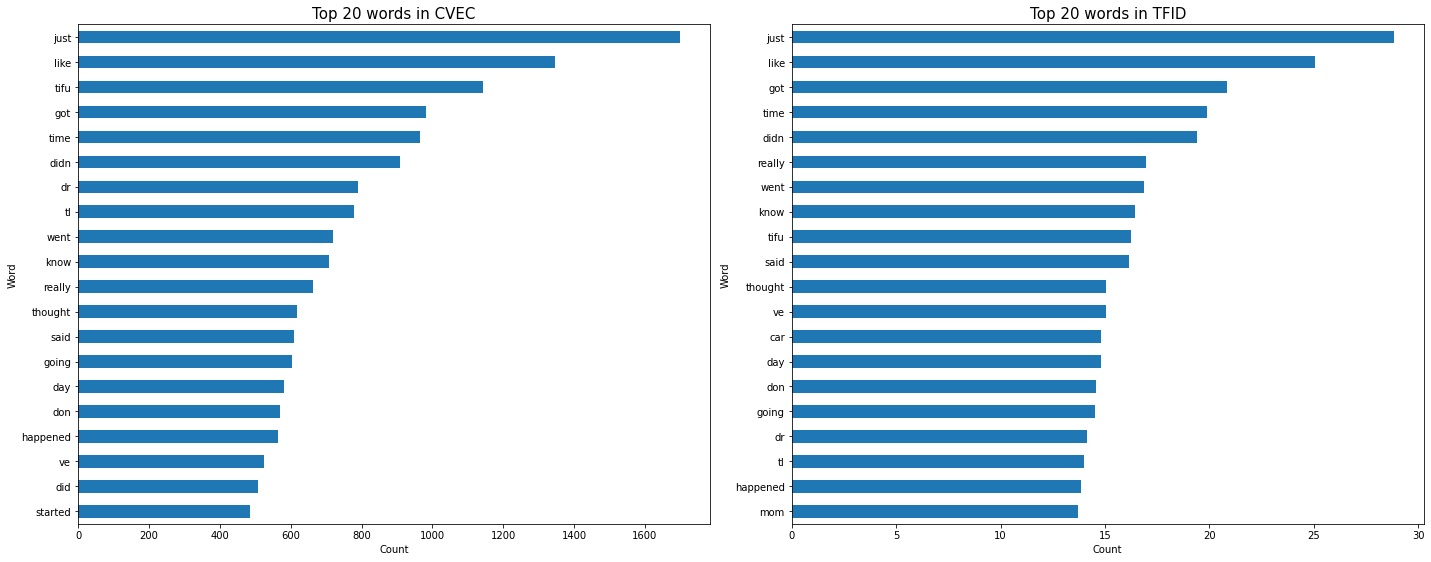

In [45]:
# Plot top 20 words for /r/tifu
plt_top_20(tifu_data)
plt.savefig('../assets/top_20_tifu.png')

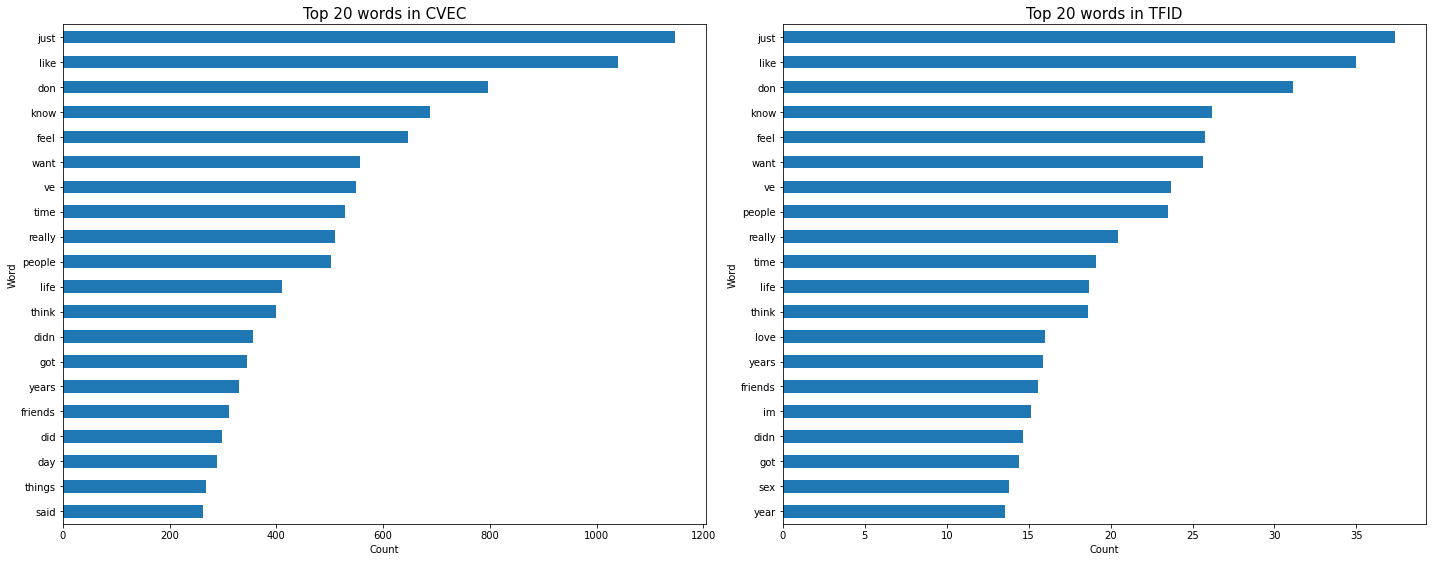

In [46]:
# Plot top 20 words for /r/confessions
plt_top_20(confessions_data)
plt.savefig('../assets/top_20_confessions.png')

From the top 20 words observed, even though the built in English stop words lists were used in the text feature extraction tools, there are still a lot of words in the top 20 list that are used more as link words such as `just`, `like`, `got` etc. 

These words do not have any particular relation to either subreddit as the nature of the subreddit is composed of stories, where people expressing their stories could be using a lot more of these words. As it is currently inconclusive, there will be no further removal of such words before testing the model.

## 4. Export Data <a class="anchor" id="chapter4"></a>
---

The data now contains 3 versions of text
- `text_base`: Tokenized text to be used for model selection
- `text_lem` : Lemmatized tokens to be used for model evaluation
- `text_stem` : Stemmed tokens to be used for model evaluation

Given these 3 versions of text, a classification model can now be created to be evaluated if natural language processing can be used to classify similarly written posts (story categories) into two different subreddits.

In [207]:
text_df.to_csv('../data/processed_text.csv',index=False) # Export data